# Trinucleotide frequency in Fig 3D

In [1]:
import os
from collections import defaultdict

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [2]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
data_dir = '../../../data'

In [4]:
colors_d = {
    'C': '#adabadff', 
    'T': '#636163ff'
}

In [5]:
sorted_trinuc = []
for ref in ['C', 'T']: 
    for nuc5 in ['A', 'C', 'G', 'T']: 
        for nuc3 in ['A', 'C', 'G', 'T']: 
            sorted_trinuc.append(nuc5+ref+nuc3)

### Load data

Input data corresponds to Dataset EV5

In [6]:
sig_profiles_f = os.path.join(data_dir, 'EV_datasets', 'EV5_table.txt')
sig_profiles_df = pd.read_csv(sig_profiles_f, sep='\t', header=0)
sig_profiles_df.head(3)

,Mutation_type,Trinucleotide,Trinucleotide_genome_frequency,SBS1,SBS2,SBS3,SBS4,SBS5,SBS7a,SBS7b,...,SBS5_normalised,SBS7a_normalised,SBS7b_normalised,SBS8_normalised,SBS13_normalised,SBS17a_normalised,SBS17b_normalised,SBS18_normalised,SBS40_normalised,SBS93_normalised
0,A[C>A]A,ACA,0.040418,0.000876,5.790059e-07,0.020920,0.042451,0.012052,0.000067,0.002344,...,0.006892,0.000035,0.001182,0.032109,0.001397,0.001856,0.000603,0.026066,0.021034,0.007795
1,A[C>A]C,ACC,0.022682,0.002220,1.455045e-04,0.016343,0.032990,0.009337,0.000177,0.000457,...,0.009514,0.000164,0.000411,0.061074,0.000971,0.001444,0.000224,0.014034,0.017539,0.009569
2,A[C>A]G,ACG,0.004613,0.000180,5.361861e-05,0.001808,0.016116,0.001908,0.000073,0.000192,...,0.009561,0.000334,0.000849,0.030270,0.001824,0.000384,0.000519,0.011068,0.019599,0.010671


### Compute mutational probabilities per trinucleotide

We add up mutational probabilities across three possible alternates of a reference trinucleotide

In [7]:
signatures_to_plot = ['SBS1', 'SBS17b', 'SBS17a']

In [8]:
# Reformat mutation type
mutation_types = sig_profiles_df['Mutation_type'].tolist()
mutation_types_reformat = [m[0]+m[2]+m[-1]+'>'+m[-3] for m in mutation_types]
sig_profiles_df['trinuc_change'] = mutation_types_reformat
sig_profiles_df.head(3)

,Mutation_type,Trinucleotide,Trinucleotide_genome_frequency,SBS1,SBS2,SBS3,SBS4,SBS5,SBS7a,SBS7b,...,SBS7a_normalised,SBS7b_normalised,SBS8_normalised,SBS13_normalised,SBS17a_normalised,SBS17b_normalised,SBS18_normalised,SBS40_normalised,SBS93_normalised,trinuc_change
0,A[C>A]A,ACA,0.040418,0.000876,5.790059e-07,0.020920,0.042451,0.012052,0.000067,0.002344,...,0.000035,0.001182,0.032109,0.001397,0.001856,0.000603,0.026066,0.021034,0.007795,ACA>A
1,A[C>A]C,ACC,0.022682,0.002220,1.455045e-04,0.016343,0.032990,0.009337,0.000177,0.000457,...,0.000164,0.000411,0.061074,0.000971,0.001444,0.000224,0.014034,0.017539,0.009569,ACC>A
2,A[C>A]G,ACG,0.004613,0.000180,5.361861e-05,0.001808,0.016116,0.001908,0.000073,0.000192,...,0.000334,0.000849,0.030270,0.001824,0.000384,0.000519,0.011068,0.019599,0.010671,ACG>A


In [9]:
# Mutational probabilities 
trinuc_mut_frequency = defaultdict(lambda: defaultdict(float))
for trinuc_change, data in sig_profiles_df.groupby('trinuc_change'): 
    trinuc = trinuc_change[0:3]
    for signature in signatures_to_plot: 
        trinuc_mut_frequency[signature][trinuc] += data[f'{signature}_normalised'].iloc[0]

In [10]:
# Trinucleotide frequency
trinuc_counts_norm = {}
for trinuc, data in sig_profiles_df.groupby('Trinucleotide'): 
    trinuc_counts_norm[trinuc] = data['Trinucleotide_genome_frequency'].iloc[0]

## Panel 3D

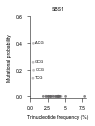

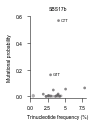

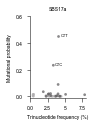

In [11]:
for signature in signatures_to_plot: 
    
    fig = plt.figure(figsize=(1, 1.5))
    ax = plt.subplot2grid((1, 1), (0, 0))

    plt.title(f'{signature}', fontsize=5)
    ax.set_ylabel('Mutational probability', fontsize=5)
    ax.set_xlabel('Trinucleotide frequency (%)', fontsize=5)

    x = []
    y = []
    colors = []
    for i, trinuc in enumerate(sorted_trinuc, 0): 
        colors += [colors_d[trinuc[1]]]
        y += [trinuc_mut_frequency[signature][trinuc]]
        x += [100*trinuc_counts_norm[trinuc]]
        
    ax.scatter(x, y, color=colors, alpha=0.75, marker='.', s=30, lw=0)
    for xi, yi, li in list(zip(x, y, sorted_trinuc)): 
        if yi > 0.1: 
            ax.text(xi+0.25, yi, li, rotation=0, fontsize=4, color='black')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set(lw=0.5)
    ax.spines['bottom'].set(lw=0.5)
    plt.setp(ax.yaxis.get_ticklines(), 'markeredgewidth', 0.5)
    plt.setp(ax.xaxis.get_ticklines(), 'markeredgewidth', 0.5)
    
    ax.set_yticks([j for j in list(map(lambda i: round(float(i), 4), ax.get_yticks())) if j > 0])
    ax.set_yticks([0.0, 0.2, 0.4, 0.6])
    ax.set_yticklabels(list(ax.get_yticks()), fontsize=5)
    ax.set_ylim(-0.01, 0.6)
    xticks = [0.0, 2.5, 5, 7.5]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize=5)
    ax.set_xlim(-0.01, 8)

    for extension in ['png']: 
        output = f'./fig_3D_{signature}.{extension}'
        plt.savefig(output, bbox_inches='tight', dpi=350)